In [1]:
import os
import gc
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' 

import time
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.backend import clear_session

from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report, confusion_matrix

In [2]:
train_dir = 'C:\\Users\\ssa20\\OneDrive\\Desktop\\Major_Code\\Saved Dataset\\train'
test_dir = 'C:\\Users\\ssa20\\OneDrive\\Desktop\\Major_Code\\Saved Dataset\\test'
input_shape=(224,224,1)
n_classes=10

In [3]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=2,
                                       horizontal_flip=False,
                                       zoom_range=0.15)

In [4]:
test_generator = ImageDataGenerator(rescale=1./255)

In [5]:
train_dataset = training_generator.flow_from_directory(train_dir, 
                                                        target_size = (224, 224),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                        color_mode="grayscale",
                                                        shuffle = True)

Found 4000 images belonging to 10 classes.


In [6]:
test_dataset = test_generator.flow_from_directory(test_dir, 
                                                 target_size = (224, 224),
                                                 batch_size = 1,
                                                 class_mode = 'categorical',
                                                  color_mode="grayscale",
                                                 shuffle = False)

Found 750 images belonging to 10 classes.


In [7]:
test_dataset.class_indices

{'1': 0,
 '2': 1,
 '3': 2,
 'a': 3,
 'b': 4,
 'c': 5,
 'j': 6,
 'my': 7,
 'name_is': 8,
 'y': 9}

## AlexNet Model

In [8]:
AlexNet = Sequential()
AlexNet.add(Input(shape=input_shape))
    
AlexNet.add(Conv2D(filters=96, kernel_size=11, strides=4))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=3, strides=2))

AlexNet.add(Conv2D(filters=256, kernel_size=5, padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=3, strides=2))

AlexNet.add(Conv2D(filters=384, kernel_size=3, padding='same'))
AlexNet.add(Activation('relu'))

AlexNet.add(Conv2D(filters=384, kernel_size=3, padding='same'))
AlexNet.add(Activation('relu'))

AlexNet.add(Conv2D(filters=256, kernel_size=3, padding='same'))
AlexNet.add(Activation('relu'))

AlexNet.add(MaxPool2D(pool_size=3, strides=2))
  
AlexNet.add(Flatten())

AlexNet.add(Dense(units=4096))
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.5, seed=73))
    
AlexNet.add(Dense(units=4096))
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.7, seed=73))

AlexNet.add(Dense(n_classes, activation='softmax'))

In [9]:
AlexNet.compile(optimizer='SGD', loss='categorical_crossentropy', metrics = ['accuracy'])

## Training

In [11]:
start_time = time.time()
#with tf.device(tf.DeviceSpec(device_type="GPU", device_index=1)):
history = AlexNet.fit(train_dataset, epochs=2)
training_time = time.time() - start_time

Epoch 1/2
500/500 [==============================] - 271s 543ms/step - loss: 0.0692 - accuracy: 0.9758
Epoch 2/2
500/500 [==============================] - 250s 500ms/step - loss: 0.0261 - accuracy: 0.9918


## Saving Trained Model

In [12]:
model_json = AlexNet.to_json()
local_time = time.ctime(time.time())
local_time = local_time.split()
dt = "_".join(local_time[:3])
tm = local_time[3].split(':')
tem = dt + "_" + "_".join(tm)
temp = "C://Users//ssa20//OneDrive//Desktop//Major_Code//Code//Saved Models//AlexNet_Saved_{}.json".format(tem)
with open(temp, 'w') as json_file:
    json_file.write(model_json)
from keras.models import save_model
from keras.models import save_model
temp = "C://Users//ssa20//OneDrive//Desktop//Major_Code//Code//Saved Models//AlexNet_Saved_weights_{}.hdf5".format(tem)
network_saved = save_model(AlexNet, temp)

## Testing

In [13]:
print('\nAccuracy on training set:',history.history['accuracy'][-1],'\nLoss on training set:', round(history.history['loss'][-1]))


Accuracy on training set: 0.9917500019073486 
Loss on training set: 0


Accuracy on test set =  1.0


<AxesSubplot:>

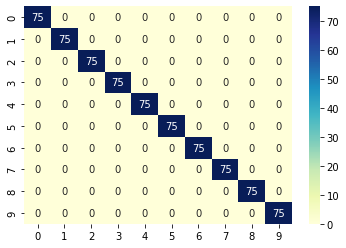

In [14]:
predictions = AlexNet.predict(test_dataset)
predictions = np.argmax(predictions,axis=1)
print('Accuracy on test set = ',accuracy_score(test_dataset.classes, predictions))
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

In [15]:
prfs = precision_recall_fscore_support(test_dataset.classes, predictions, average=None)
print('Precision for each class - ',prfs[0])
print('Recall for each class - ',prfs[1])

Precision for each class -  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall for each class -  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Clear Session

In [16]:
clear_session()
gc.collect()

698